In [156]:
import pandas as pd

df = pd.read_csv('C:/Users/User/Desktop/CS/ML/Covid19stats.csv',encoding='utf-8', dtype=str,index_col = 'จังหวัด')

In [157]:
df.T[['กรุงเทพมหานคร']].T

,6-เม.ย.,7-เม.ย.,8-เม.ย.,9-เม.ย.,10-เม.ย.,11-เม.ย.,12-เม.ย.,13-เม.ย.,14-เม.ย.,15-เม.ย.,...,22-เม.ย.,23-เม.ย.,24-เม.ย.,25-เม.ย.,26-เม.ย.,27-เม.ย.,28-เม.ย.,29-เม.ย.,30-เม.ย.,1-พ.ค.
จังหวัด,,,,,,,,,,,,,,,,,,,,,
กรุงเทพมหานคร,156,216,95,266,185,236,137,194,351,409,...,446,740,1582,1078,901,993,830,689,417,739


In [158]:
data = np.array(df.iloc[0,:])
data = data.astype(int)
data = data

In [159]:
size = len(data)
trainset = data[:int(size*0.6)]
valset = data[int(size*0.6):]

[[[0.09860936]
  [0.13653603]
  [0.06005057]]

 [[0.13653603]
  [0.06005057]
  [0.16814159]]

 [[0.06005057]
  [0.16814159]
  [0.11694058]]

 [[0.16814159]
  [0.11694058]
  [0.14917826]]

 [[0.11694058]
  [0.14917826]
  [0.08659924]]

 [[0.14917826]
  [0.08659924]
  [0.12262958]]

 [[0.08659924]
  [0.12262958]
  [0.22187105]]

 [[0.12262958]
  [0.22187105]
  [0.2585335 ]]

 [[0.22187105]
  [0.2585335 ]
  [0.19721871]]

 [[0.2585335 ]
  [0.19721871]
  [0.17635904]]

 [[0.19721871]
  [0.17635904]
  [0.21871049]]

 [[0.17635904]
  [0.21871049]
  [0.1852086 ]]

 [[0.21871049]
  [0.1852086 ]
  [0.22123894]]

 [[0.1852086 ]
  [0.22123894]
  [0.23072061]]

 [[0.22123894]
  [0.23072061]
  [0.28192162]]

 [[0.23072061]
  [0.28192162]
  [0.46776233]]

 [[0.28192162]
  [0.46776233]
  [1.        ]]

 [[0.46776233]
  [1.        ]
  [0.68141593]]]
Epoch 1/200
1/1 [==============================] - 2s 2s/step - loss: 0.3189 - val_loss: 0.5066
Epoch 2/200
1/1 [==============================] - 0s 28ms

1/1 [==============================] - 0s 30ms/step - loss: 0.1081 - val_loss: 0.1211
Epoch 76/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1077 - val_loss: 0.1202
Epoch 77/200
1/1 [==============================] - 0s 29ms/step - loss: 0.1073 - val_loss: 0.1191
Epoch 78/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1069 - val_loss: 0.1176
Epoch 79/200
1/1 [==============================] - 0s 36ms/step - loss: 0.1064 - val_loss: 0.1158
Epoch 80/200
1/1 [==============================] - 0s 30ms/step - loss: 0.1059 - val_loss: 0.1138
Epoch 81/200
1/1 [==============================] - 0s 30ms/step - loss: 0.1053 - val_loss: 0.1115
Epoch 82/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1048 - val_loss: 0.1089
Epoch 83/200
1/1 [==============================] - 0s 31ms/step - loss: 0.1041 - val_loss: 0.1062
Epoch 84/200
1/1 [==============================] - 0s 36ms/step - loss: 0.1035 - val_loss: 0.1032
Epoch 85/200
1/1 [=====

1/1 [==============================] - 0s 30ms/step - loss: 0.0881 - val_loss: 0.0864
Epoch 158/200
1/1 [==============================] - 0s 31ms/step - loss: 0.0880 - val_loss: 0.0872
Epoch 159/200
1/1 [==============================] - 0s 31ms/step - loss: 0.0879 - val_loss: 0.0882
Epoch 160/200
1/1 [==============================] - 0s 28ms/step - loss: 0.0877 - val_loss: 0.0893
Epoch 161/200
1/1 [==============================] - 0s 33ms/step - loss: 0.0876 - val_loss: 0.0894
Epoch 162/200
1/1 [==============================] - 0s 29ms/step - loss: 0.0875 - val_loss: 0.0888
Epoch 163/200
1/1 [==============================] - 0s 30ms/step - loss: 0.0874 - val_loss: 0.0888
Epoch 164/200
1/1 [==============================] - 0s 28ms/step - loss: 0.0872 - val_loss: 0.0892
Epoch 165/200
1/1 [==============================] - 0s 29ms/step - loss: 0.0871 - val_loss: 0.0900
Epoch 166/200
1/1 [==============================] - 0s 30ms/step - loss: 0.0869 - val_loss: 0.0910
Epoch 167/200


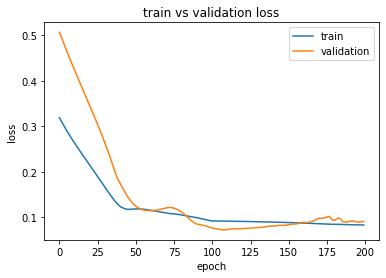

[[904.6878]]


In [194]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
from matplotlib import pyplot
 
# split a univariate sequence
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)
 
# define input sequence
raw_seq = data
max = np.max(data)
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
X_train,y_train,X_val,y_val = X[:int(size*0.7)],y[:int(size*0.7)],X[int(size*0.7):],y[int(size*0.7):]
X_train,y_train,X_val,y_val = X_train/max,y_train/max,X_val/max,y_val/max
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], n_features))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], n_features))
print(X_train)
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')
# fit model
history = model.fit(X_train, y_train, epochs=200, verbose=1, validation_data=(X_val, y_val))

# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# demonstrate prediction
x_input = array([1078,  901, 993])/max
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0) * max
print(yhat)

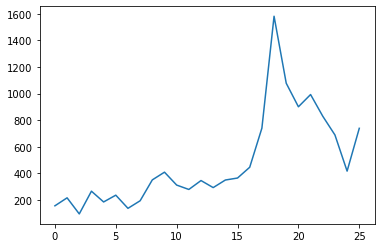

In [195]:
pyplot.plot(data)

In [181]:
#### forward pass ####
#result = []
#for i in range(len(X_train)):
#    if i == 0:
#        test = array([X_train[0][0][0],X_train[0][1][0],X_train[0][2][0]])
#        test = test.reshape((1, n_steps, n_features))
#    else:
#        test = array([test[0][1][0],test[0][2][0],res[0][0]])
#        test = test.reshape((1, n_steps, n_features))
#    res = model.predict(test, verbose=0)
#    result.append(res[0][0])
#    print(test)
#    print(res)

In [196]:
result = []
for i in range(len(X_val)):
    test = array([X_val[i][0][0],X_val[i][1][0],X_val[i][2][0]])
    test = test.reshape((1, n_steps, n_features))
    res = model.predict(test, verbose=0)
    result.append(res[0][0])
    print(test)
    print(res)

[[[1.        ]
  [0.68141593]
  [0.56953224]]]
[[0.61469233]]
[[[0.68141593]
  [0.56953224]
  [0.62768647]]]
[[0.57186335]]
[[[0.56953224]
  [0.62768647]
  [0.52465234]]]
[[0.519711]]
[[[0.62768647]
  [0.52465234]
  [0.43552465]]]
[[0.45774916]]
[[[0.52465234]
  [0.43552465]
  [0.26359039]]]
[[0.34733173]]


In [197]:
data

array([ 156,  216,   95,  266,  185,  236,  137,  194,  351,  409,  312,
        279,  346,  293,  350,  365,  446,  740, 1582, 1078,  901,  993,
        830,  689,  417,  739])

In [324]:
import pandas as pd
df_result = pd.DataFrame()
df_result['Ground truth'] = data[:]

In [325]:
df_result

,Ground truth
0,156
1,216
2,95
3,266
4,185
5,236
6,137
7,194
8,351
9,409


In [326]:
date = pd.to_datetime([i+1 for i in range(0,len(df_result.T.columns))], unit='D',
               origin=pd.Timestamp('2021-04-05'))

In [327]:
df_result['date'] = date
df_result.set_index('date',inplace=True)
df_result = df_result

In [328]:
df_result

,Ground truth
date,
2021-04-06,156
2021-04-07,216
2021-04-08,95
2021-04-09,266
2021-04-10,185
2021-04-11,236
2021-04-12,137
2021-04-13,194
2021-04-14,351


In [329]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_result.index[-1]+ DateOffset(days=x)for x in range(0,4)]

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_result.columns)

future_datest_df

future_df=pd.concat([df_result,future_datest_df])

In [330]:
future_df

,Ground truth
2021-04-06,156
2021-04-07,216
2021-04-08,95
2021-04-09,266
2021-04-10,185
2021-04-11,236
2021-04-12,137
2021-04-13,194
2021-04-14,351
2021-04-15,409


In [331]:
data[len(X_train)+2:len(X_train)+3]

array([901])

In [332]:
#future_df['Predict'] = np.array([np.nan]*(len(X_train)+2)+[data[len(X_train)+2:len(X_train)+3][0]/max]+result+[np.nan]*7)*max

In [333]:
future_df

,Ground truth
2021-04-06,156
2021-04-07,216
2021-04-08,95
2021-04-09,266
2021-04-10,185
2021-04-11,236
2021-04-12,137
2021-04-13,194
2021-04-14,351
2021-04-15,409


In [334]:
pred = future_df.iloc[-6:,0][0:3]/max

In [335]:
pred[0]

0.43552465233881166

In [336]:
#### forward pass ####
result = []
for i in range(3):
    if i == 0:
        test = array([pred[0],pred[1],pred[2]])
       # test = array([X_val[0][0][0],X_train[0][1][0],X_train[0][2][0]])
        test = test.reshape((1, n_steps, n_features))
    else:
        test = array([test[0][1][0],test[0][2][0],res[0][0]])
        test = test.reshape((1, n_steps, n_features))
    res = model.predict(test, verbose=0)
    result.append(res[0][0]*max)
    print(test*max)
    print(res*max)

[[[689.]
  [417.]
  [739.]]]
[[606.6654]]
[[[417.        ]
  [739.        ]
  [606.66537964]]]
[[583.2598]]
[[[739.        ]
  [606.66537964]
  [583.25982267]]]
[[588.46277]]


In [365]:
yhat = list(model.predict(X_train)*max) + list(model.predict(X_val)*max)
#test = np.expand_dims(yhat, axis=0)
ttrain = []
for i in yhat:
    ttrain.append(i[0])
ttrain
#model.predict(X_val)*max

[235.25272,
 274.03644,
 263.785,
 287.97354,
 255.36084,
 259.95612,
 315.14786,
 379.19016,
 376.26642,
 350.81784,
 355.91977,
 345.10977,
 365.3231,
 375.94498,
 419.5765,
 565.62054,
 1079.8132,
 1079.9698,
 972.44324,
 904.68774,
 822.18274,
 724.1592,
 549.4788]

In [343]:
list(future_df.iloc[len(future_df.index)-4:len(future_df.index)-3,0])

[739]

In [366]:
future_df

,Ground truth,Predict
2021-04-06,156,NaN
2021-04-07,216,NaN
2021-04-08,95,NaN
2021-04-09,266,NaN
2021-04-10,185,NaN
2021-04-11,236,NaN
2021-04-12,137,NaN
2021-04-13,194,NaN
2021-04-14,351,NaN
2021-04-15,409,NaN


In [384]:
print([np.nan]*3+ttrain[:-1]+list(future_df.iloc[len(future_df.index)-4:len(future_df.index)-3,0])+result)
print(len(future_df.index))
#future_df['Predict'] = np.array([np.nan]*(len(future_df.index)-4)+list(future_df.iloc[len(future_df.index)-4:len(future_df.index)-3,0])+result)

[nan, nan, nan, 235.25272, 274.03644, 263.785, 287.97354, 255.36084, 259.95612, 315.14786, 379.19016, 376.26642, 350.81784, 355.91977, 345.10977, 365.3231, 375.94498, 419.5765, 565.62054, 1079.8132, 1079.9698, 972.44324, 904.68774, 822.18274, 724.1592, 739, 606.6653796434402, 583.259822666645, 588.4627600908279]
29


In [385]:
future_df['Predict'] = np.array([np.nan]*3+ttrain[:-1]+list(future_df.iloc[len(future_df.index)-4:len(future_df.index)-3,0])+result)

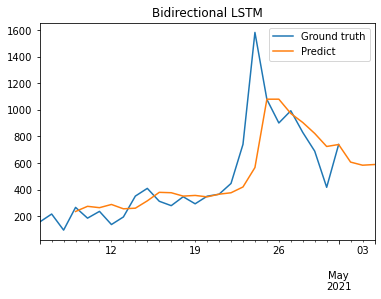

In [386]:
future_df.plot(title = 'Bidirectional LSTM',figsize=(6,4))

18
5


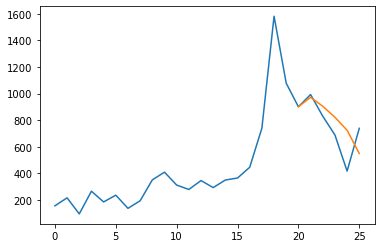

In [207]:
#pyplot.plot(data[3:len(result)+3])
pyplot.plot(data[:])
pyplot.plot(np.array([np.nan]*(len(X_train)+2)+[data[len(X_train)+2:len(X_train)+3]/max]+result)*max)
print(len(X_train))
print(len(result))

In [210]:
np.array([np.nan]*(len(X_train)+2)+[data[len(X_train)+2:len(X_train)+3]/max]+result)*max

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, array([901.]),
       972.4432666301727, 904.687824845314, 822.1828298568726,
       724.1591681838036, 549.4788008332253], dtype=object)

In [208]:
from sklearn.metrics import mean_absolute_error
gt = data[len(data)-len(result):]
pd = np.array(result)*max
mean_absolute_error(gt, pd)

145.02154541015625

In [209]:
print(pd)

[972.44324 904.6878  822.1828  724.1592  549.4788 ]


In [68]:
np.array([0]*5+result)*max

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        , 794.36244929, 723.77567226])

In [69]:
np.array(result)*max

array([794.3624, 723.7757], dtype=float32)

In [116]:
0.467 *max

738.7940000000001

In [22]:
import numpy as np
dataset = []
for i in df:
    data = []
    for j in df.index:
        data.append(int(df[i][j]))
    dataset.append(data)
dataset = np.array(dataset)
raw_dataset = dataset

In [23]:
print(dataset)

[[156   2  18 ...   0   0   0]
 [216   2  11 ...   0   0   0]
 [ 95   6  14 ...   0   0   0]
 ...
 [830 161 108 ...   0   0   0]
 [689 151 112 ...   1   0   0]
 [417 138 131 ...   0   0   0]]


In [24]:
size = len(dataset)
trainset = dataset[:int(size*0.8)]
valset = dataset[int(size*0.8):]
print(trainset,valset)

[[ 156    2   18 ...    0    0    0]
 [ 216    2   11 ...    0    0    0]
 [  95    6   14 ...    0    0    0]
 ...
 [ 740  237  125 ...    4    4    2]
 [1582  151  119 ...    0    0    0]
 [1078  163   75 ...    2    0    2]] [[901  84 104  97 110  18  56   0  38   2  61  22  21  48  32  21  19  19
    9  11  11  10   9  12  23  22   8   2   7   9  16  13  14   3  11  14
    6   4   9  26   3   7   4   6   0   3  10   7   2   1   5   9  10   5
    0   0   5   0   4   5  12   3   6   1   0   2   2   5   4   3   0   5
    0   4   2   0   1]
 [993 149  93  93  80  62  61  60  33  30  29  28  27  24  23  21  21  20
   19  18  18  18  17  13  11   9   8   8   8   8   7   7   7   7   7   7
    7   7   6   6   6   6   6   5   5   5   5   4   4   4   4   4   4   4
    4   4   3   3   3   3   3   3   2   2   2   1   1   1   1   1   1   0
    0   0   0   0   0]
 [830 161 108  71  59  57  55  52  40  38  37  27  23  21  20  19  19  19
   19  17  16  16  14  14  14  13  13  12  12  11  11  11  1

[[ 156    2   18 ...    0    0    0]
 [ 216    2   11 ...    0    0    0]
 [  95    6   14 ...    0    0    0]
 ...
 [1078  163   75 ...    2    0    2]
 [ 901   84  104 ...    2    0    1]
 [ 993  149   93 ...    0    0    0]]
Epoch 1/300
1/1 [==============================] - 2s 2s/step - loss: 9.0509e-04 - accuracy: 0.0000e+00 - val_loss: 0.0053 - val_accuracy: 0.0000e+00
Epoch 2/300
1/1 [==============================] - 0s 29ms/step - loss: 8.8030e-04 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 3/300
1/1 [==============================] - 0s 29ms/step - loss: 8.5724e-04 - accuracy: 0.0000e+00 - val_loss: 0.0052 - val_accuracy: 0.0000e+00
Epoch 4/300
1/1 [==============================] - 0s 28ms/step - loss: 8.3629e-04 - accuracy: 0.3214 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 5/300
1/1 [==============================] - 0s 29ms/step - loss: 8.1695e-04 - accuracy: 0.6429 - val_loss: 0.0051 - val_accuracy: 0.0000e+00
Epoch 6/300
1/1 [=====

Epoch 56/300
1/1 [==============================] - 0s 28ms/step - loss: 1.8802e-04 - accuracy: 0.7500 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 57/300
1/1 [==============================] - 0s 28ms/step - loss: 1.8576e-04 - accuracy: 0.7500 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 58/300
1/1 [==============================] - 0s 29ms/step - loss: 1.8390e-04 - accuracy: 0.7500 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 59/300
1/1 [==============================] - 0s 30ms/step - loss: 1.8239e-04 - accuracy: 0.7500 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 60/300
1/1 [==============================] - 0s 29ms/step - loss: 1.8117e-04 - accuracy: 0.7500 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 61/300
1/1 [==============================] - 0s 30ms/step - loss: 1.8016e-04 - accuracy: 0.7500 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 62/300
1/1 [==============================] - 0s 29ms/step - loss: 1.7933e-04 - accuracy: 0.7500 - val_loss: 0.0023 - val_ac

1/1 [==============================] - 0s 29ms/step - loss: 1.4522e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 169/300
1/1 [==============================] - 0s 29ms/step - loss: 1.4493e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 170/300
1/1 [==============================] - 0s 28ms/step - loss: 1.4464e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 171/300
1/1 [==============================] - 0s 28ms/step - loss: 1.4435e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 172/300
1/1 [==============================] - 0s 28ms/step - loss: 1.4406e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 173/300
1/1 [==============================] - 0s 28ms/step - loss: 1.4376e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 174/300
1/1 [==============================] - 0s 29ms/step - loss: 1.4347e-04 - accuracy: 0.7500 - val_loss: 0.0022 - val_accuracy:

1/1 [==============================] - 0s 28ms/step - loss: 1.1636e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 281/300
1/1 [==============================] - 0s 29ms/step - loss: 1.1619e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 282/300
1/1 [==============================] - 0s 28ms/step - loss: 1.1602e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 283/300
1/1 [==============================] - 0s 28ms/step - loss: 1.1585e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 284/300
1/1 [==============================] - 0s 29ms/step - loss: 1.1567e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 285/300
1/1 [==============================] - 0s 29ms/step - loss: 1.1550e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 286/300
1/1 [==============================] - 0s 29ms/step - loss: 1.1534e-04 - accuracy: 0.7500 - val_loss: 0.0020 - val_accuracy:

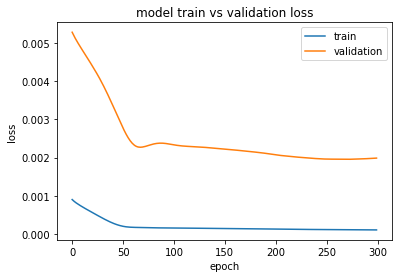

[[[284. 180. 106.  64.  68.  47.  25.  25.  28.  26.  25.  21.  18.  21.
    18.  17.  17.  17.  19.  17.  15.  12.  15.  12.   9.  13.  11.   8.
    10.   5.   6.   9.   6.   7.   6.   4.   5.   6.   5.   8.   4.   4.
     4.   4.   4.   4.   5.   4.   1.   3.   3.   4.   4.   5.   1.   5.
     2.  -0.   3.  -1.   1.   0.   0.   2.   2.   3.   3.   0.   1.   0.
     2.   0.   0.   0.  -0.  -1.   1.]
  [315. 177. 110.  61.  67.  50.  20.  24.  31.  29.  28.  24.  18.  27.
    20.  19.  20.  19.  22.  21.  15.  10.  18.  13.  12.  14.  13.   7.
    10.   6.   6.  10.   7.   7.   6.   4.   5.   6.   6.  11.   5.   4.
     5.   5.   5.   4.   5.   5.   1.   5.   3.   4.   5.   6.   1.   7.
     2.  -1.   5.  -0.   1.  -0.   1.   2.   2.   4.   4.  -0.   1.   0.
     2.   0.   0.   0.  -0.  -0.   2.]]]


In [46]:
# multivariate multi-step encoder-decoder lstm example
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
 
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

print(raw_dataset)
max = np.max(raw_dataset)
dataset = trainset/max
# choose a number of time steps
n_steps_in, n_steps_out = 2, 2
# covert into input/output
X_train, y_train = split_sequences(dataset, n_steps_in, n_steps_out)
X_val, y_val = split_sequences(valset/max, n_steps_in, n_steps_out)
# the dataset knows the number of features
n_features = X_train.shape[2]

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(50, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(n_features)))
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

# fit model
history = model.fit(X_train, y_train, epochs=300, verbose=1, validation_data=(X_val, y_val))
# plot train and validation loss
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

# demonstrate prediction
#x_input = np.concatenate((y_train[-2], y_train[-1]), axis=0)
x_input = y_train[-1]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0) * max
print(np.round(yhat))

In [47]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 50)                25600     
_________________________________________________________________
repeat_vector_4 (RepeatVecto (None, 2, 50)             0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 2, 50)             20200     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 2, 77)             3927      
Total params: 49,727
Trainable params: 49,727
Non-trainable params: 0
_________________________________________________________________


In [235]:
import pandas as pd
df_test = pd.DataFrame()
df_test['Ground truth'] = np.array(df.iloc[0,:].T).astype(int).cumsum()

In [236]:
df_test

,Ground truth
0,156
1,372
2,467
3,733
4,918
5,1154
6,1291
7,1485
8,1836
9,2245
